___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# K Nearest Neighbors Project 

Welcome to the KNN Project! This will be a simple project very similar to the lecture, except you'll be given another data set. Go ahead and just follow the directions below.
## Import Libraries
**Import pandas,seaborn, and the usual libraries.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Get the Data
** Read the 'KNN_Project_Data csv file into a dataframe **

In [2]:
df = pd.read_csv(r'C:/Users/Sreeraj/Documents/KNN_Project_Data.csv')

**Check the head of the dataframe.**

In [3]:
df.head()

XVPM         GWYH         TRAT        TLLZ         IGGA  \
0  1636.670614   817.988525  2565.995189  358.347163   550.417491   
1  1013.402760   577.587332  2644.141273  280.428203  1161.873391   
2  1300.035501   820.518697  2025.854469  525.562292   922.206261   
3  1059.347542  1066.866418   612.000041  480.827789   419.467495   
4  1018.340526  1313.679056   950.622661  724.742174   843.065903   

          HYKR         EDFS        GUUB         MGJM         JHZC  \
0  1618.870897  2147.641254  330.727893  1494.878631   845.136088   
1  2084.107872   853.404981  447.157619  1193.032521   861.081809   
2  2552.355407   818.676686  845.491492  1968.367513  1647.186291   
3   685.666983   852.867810  341.664784  1154.391368  1450.935357   
4  1370.554164   905.469453  658.118202   539.459350  1899.850792   

   TARGET CLASS  
0             0  
1             1  
2             1  
3             0  
4             0

XVPM         GWYH         TRAT        TLLZ         IGGA  \
0  1636.670614   817.988525  2565.995189  358.347163   550.417491   
1  1013.402760   577.587332  2644.141273  280.428203  1161.873391   
2  1300.035501   820.518697  2025.854469  525.562292   922.206261   
3  1059.347542  1066.866418   612.000041  480.827789   419.467495   
4  1018.340526  1313.679056   950.622661  724.742174   843.065903   

          HYKR         EDFS        GUUB         MGJM         JHZC  \
0  1618.870897  2147.641254  330.727893  1494.878631   845.136088   
1  2084.107872   853.404981  447.157619  1193.032521   861.081809   
2  2552.355407   818.676686  845.491492  1968.367513  1647.186291   
3   685.666983   852.867810  341.664784  1154.391368  1450.935357   
4  1370.554164   905.469453  658.118202   539.459350  1899.850792   

   TARGET CLASS  
0             0  
1             1  
2             1  
3             0  
4             0

# EDA

Since this data is artificial, we'll just do a large pairplot with seaborn.

**Use seaborn on the dataframe to create a pairplot with the hue indicated by the TARGET CLASS column.**

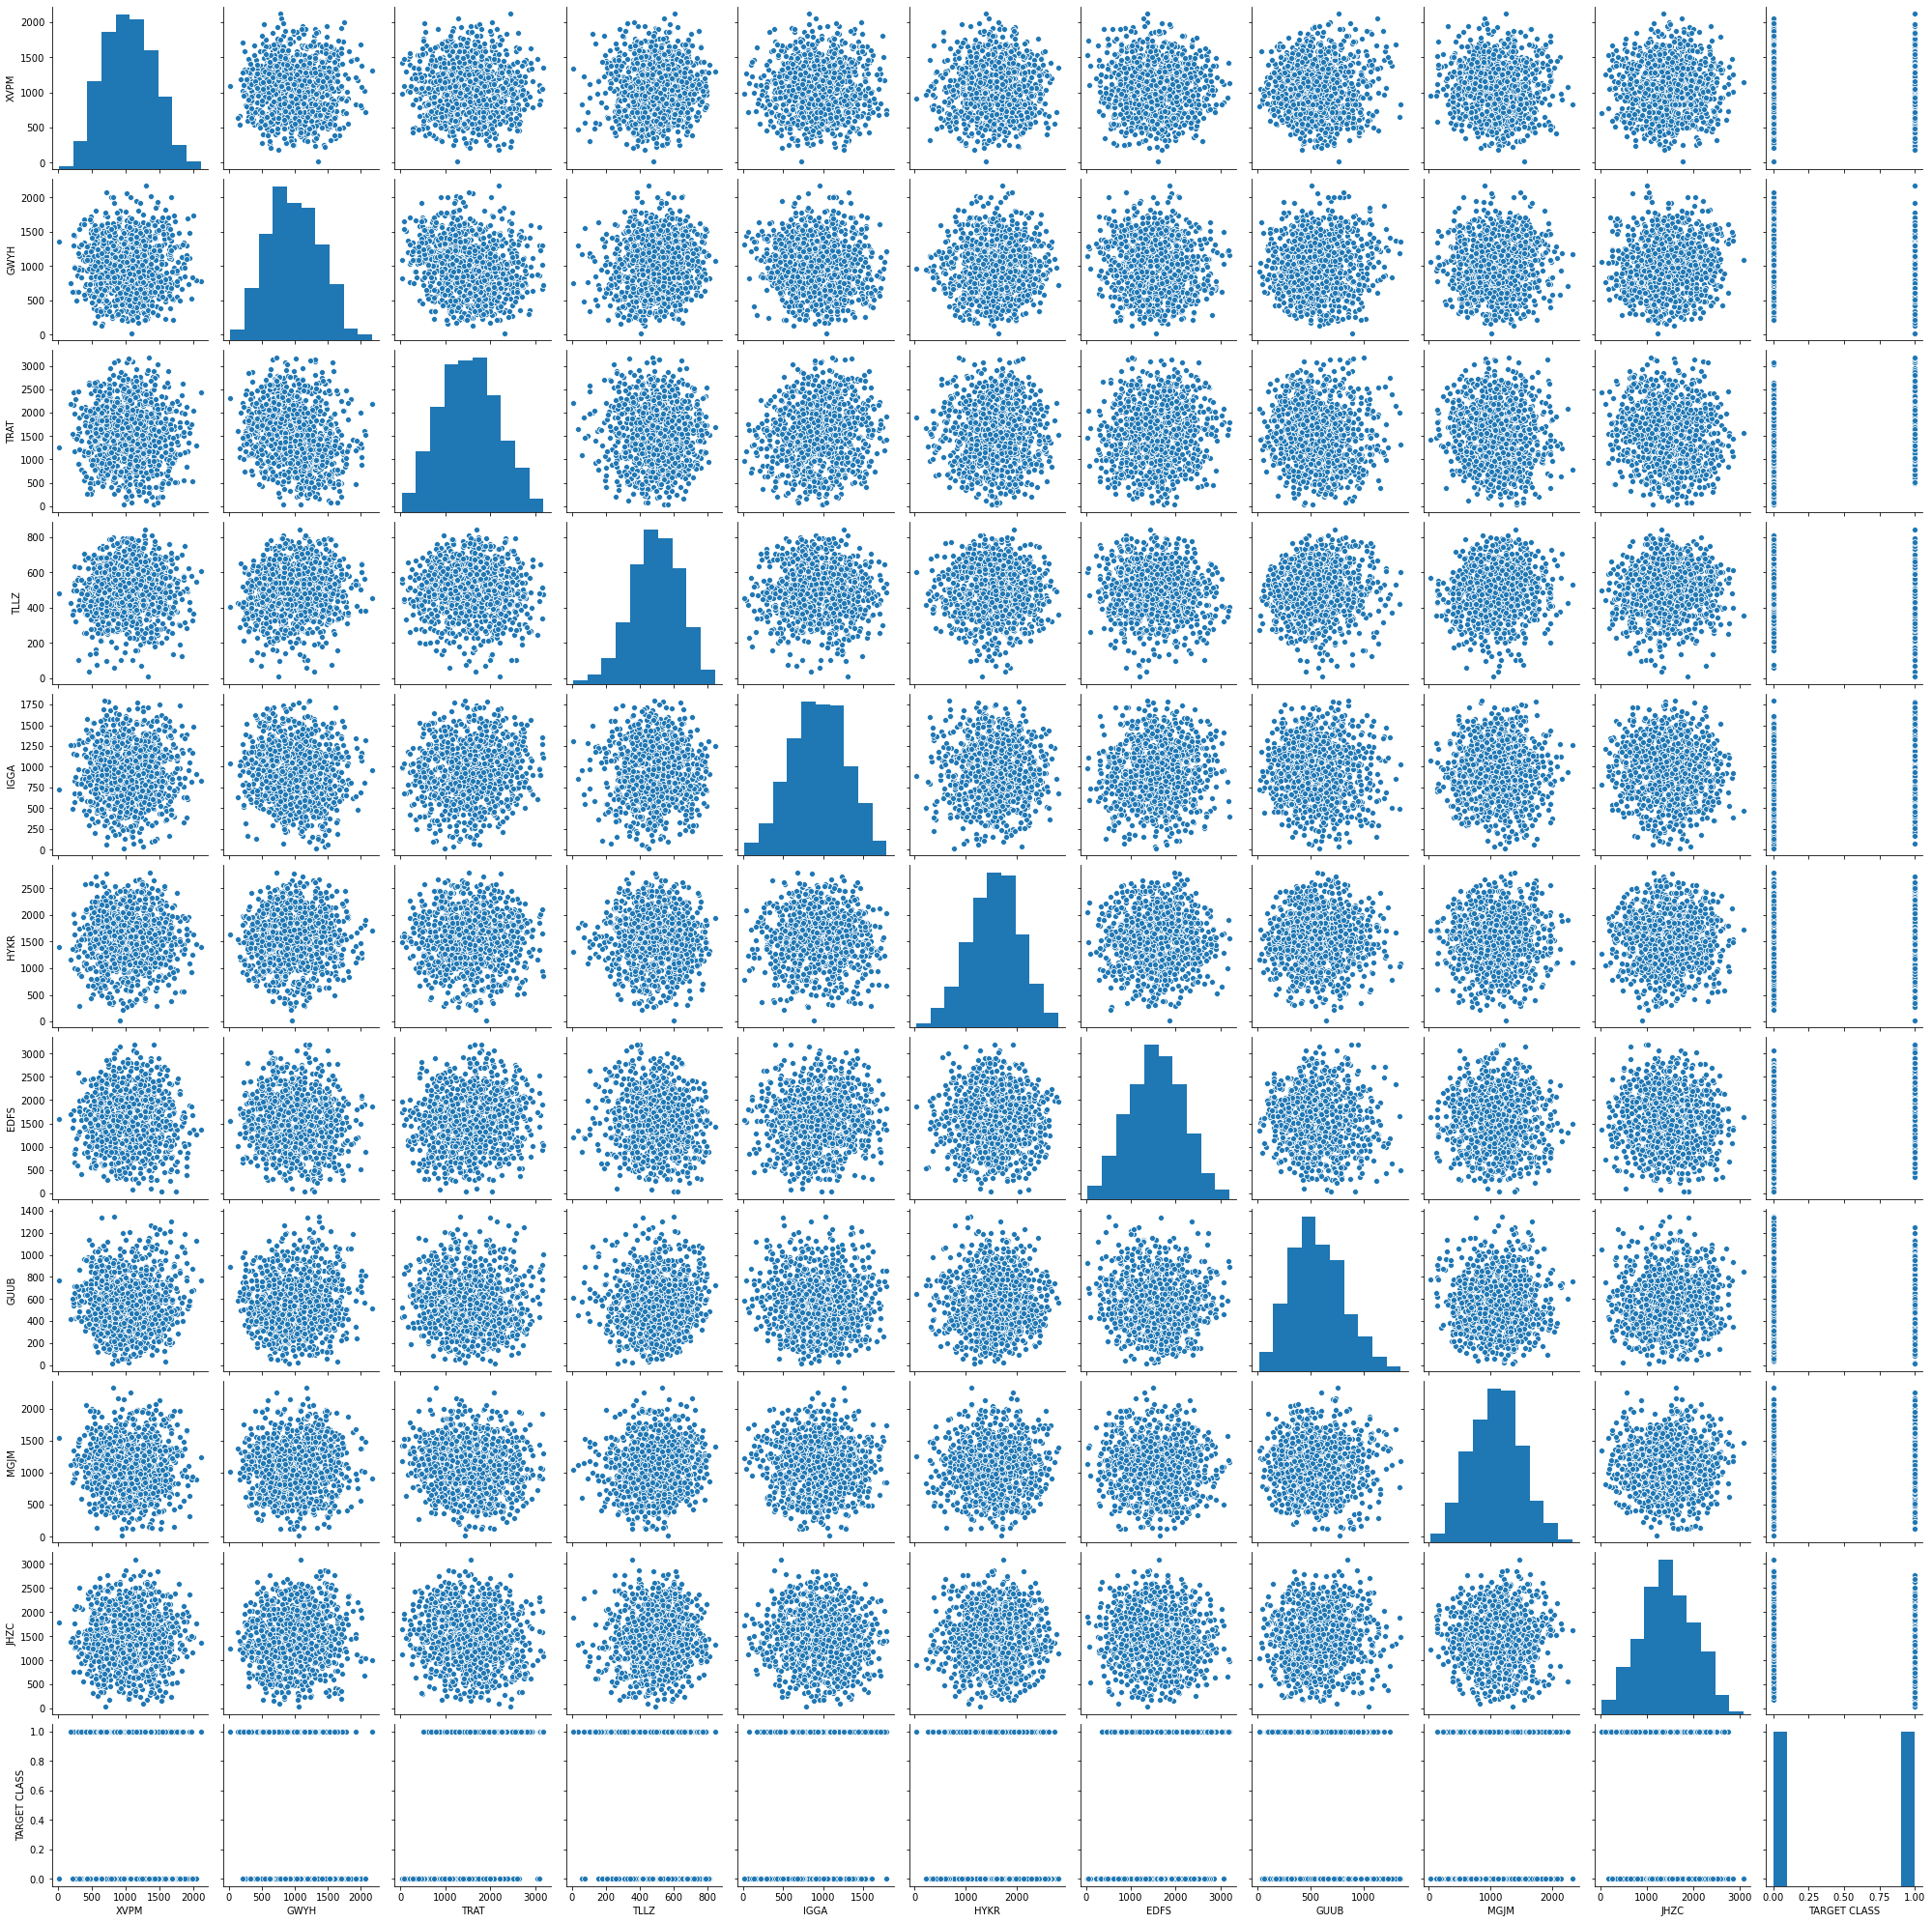

In [4]:
sns.pairplot(df)

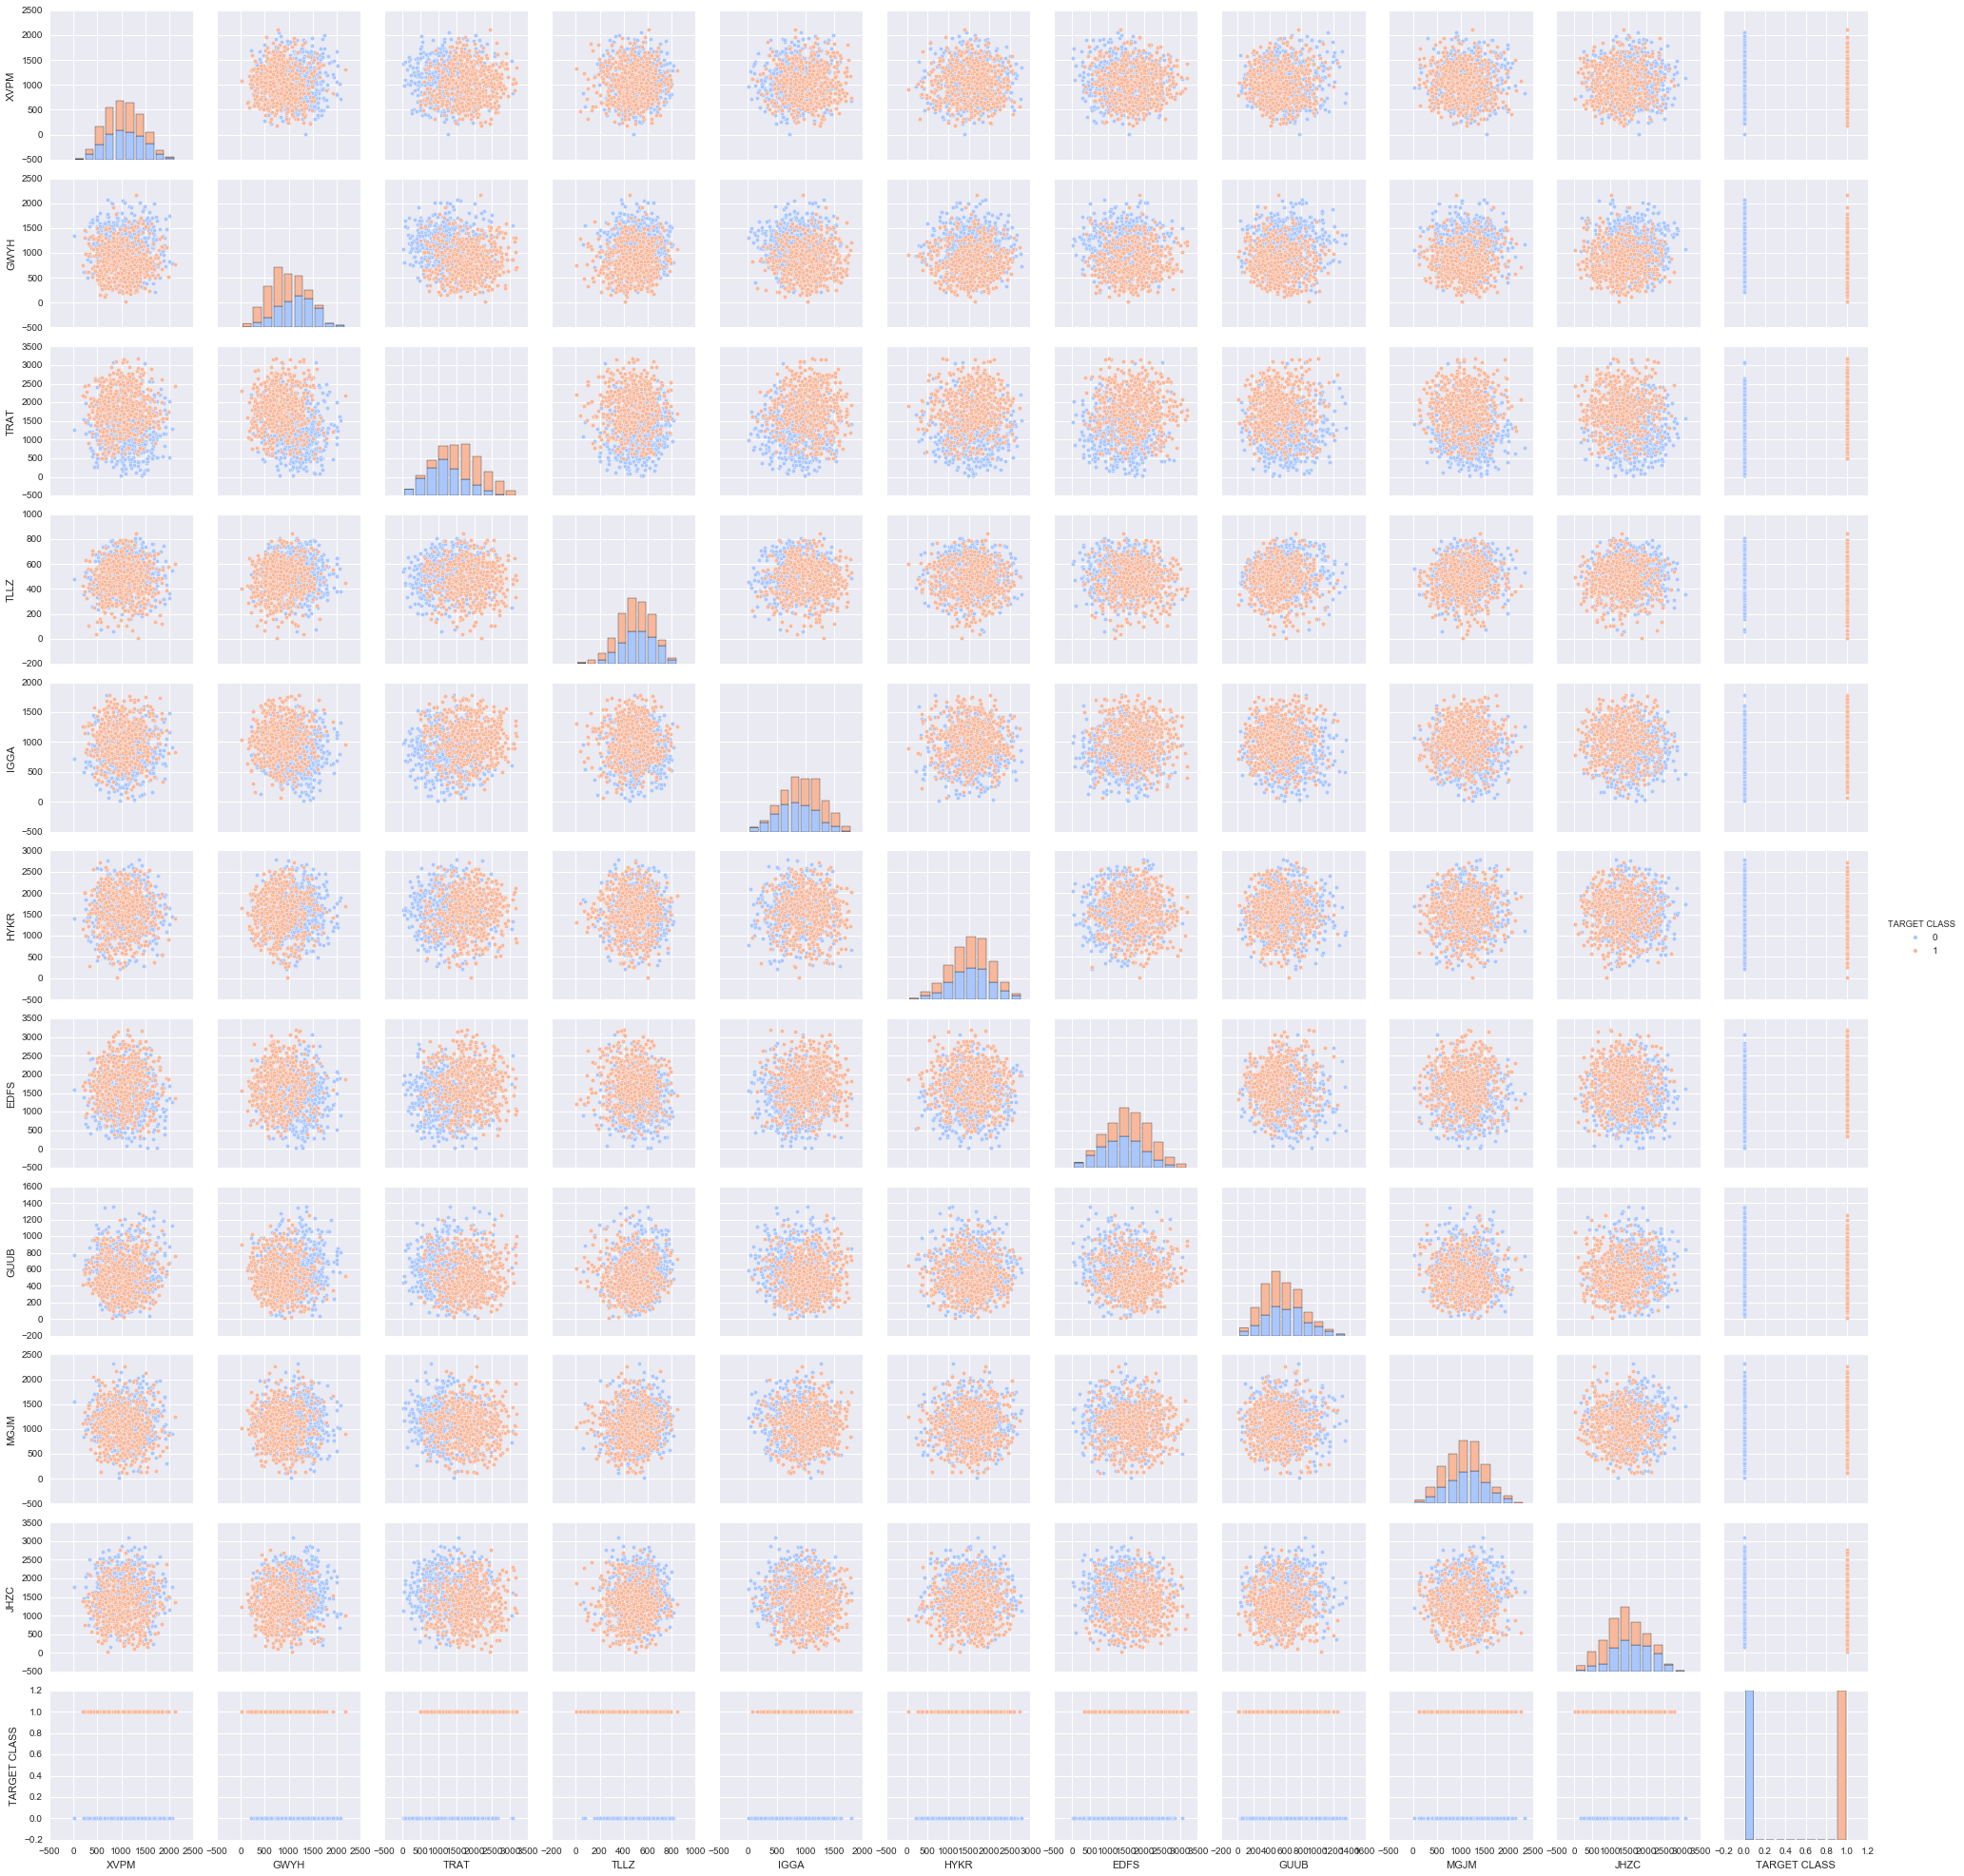

# Standardize the Variables

Time to standardize the variables.

** Import StandardScaler from Scikit learn.**

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
df.shape

(1000, 11)

** Create a StandardScaler() object called scaler.**

In [8]:
x = df.iloc[:,:10]
y = df.iloc[:,10]

In [10]:
sc = StandardScaler()
x = sc.fit_transform(x)

In [11]:
x

array([[ 1.56852168, -0.44343461,  1.61980773, ..., -0.93279392,
         1.00831307, -1.06962723],
       [-0.11237594, -1.05657361,  1.7419175 , ..., -0.46186435,
         0.25832069, -1.04154625],
       [ 0.66064691, -0.43698145,  0.77579285, ...,  1.14929806,
         2.1847836 ,  0.34281129],
       ...,
       [-0.35889496, -0.97901454,  0.83771499, ..., -1.51472604,
        -0.27512225,  0.86428656],
       [ 0.27507999, -0.99239881,  0.0303711 , ..., -0.03623294,
         0.43668516, -0.21245586],
       [ 0.62589594,  0.79510909,  1.12180047, ..., -1.25156478,
        -0.60352946, -0.87985868]])

** Fit scaler to the features.**

StandardScaler(copy=True, with_mean=True, with_std=True)

**Use the .transform() method to transform the features to a scaled version.**

In [12]:
x = pd.DataFrame(x, columns=df.columns[:-1])

In [13]:
x

XVPM      GWYH      TRAT      TLLZ      IGGA      HYKR      EDFS  \
0    1.568522 -0.443435  1.619808 -0.958255 -1.128481  0.138336  0.980493   
1   -0.112376 -1.056574  1.741918 -1.504220  0.640009  1.081552 -1.182663   
2    0.660647 -0.436981  0.775793  0.213394 -0.053171  2.030872 -1.240707   
3    0.011533  0.191324 -1.433473 -0.100053 -1.507223 -1.753632 -1.183561   
4   -0.099059  0.820815 -0.904346  1.609015 -0.282065 -0.365099 -1.095644   
..        ...       ...       ...       ...       ...       ...       ...   
995  0.776682  0.758234 -1.753322  0.507699  0.174588 -1.279354 -1.797957   
996 -0.313446  0.385206  0.885502 -0.083136 -1.208486  0.309242  0.746346   
997 -0.358895 -0.979015  0.837715  0.014018 -1.397424  0.054473  0.164120   
998  0.275080 -0.992399  0.030371  1.062954  1.142871 -0.192872  2.051386   
999  0.625896  0.795109  1.121800  1.185944  0.555582 -1.133032  0.746559   

         GUUB      MGJM      JHZC  
0   -0.932794  1.008313 -1.069627  
1   -0.461864  0.258321 -1.041546  
2    1.149298  2.184784  0.342811  
3   -0.888557  0.162310 -0.002793  
4    0.391419 -1.365603  0.787762  
..        ...       ...       ...  
995  0.431419  0.088717  1.188886  
996 -0.112571 -1.763636 -1.559081  
997 -1.514726 -0.275122  0.864287  
998 -0.036233  0.436685 -0.212456  
999 -1.251565 -0.603529 -0.879859  

[1000 rows x 10 columns]

**Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.**

XVPM      GWYH      TRAT      TLLZ      IGGA      HYKR      EDFS  \
0  1.568522 -0.443435  1.619808 -0.958255 -1.128481  0.138336  0.980493   
1 -0.112376 -1.056574  1.741918 -1.504220  0.640009  1.081552 -1.182663   
2  0.660647 -0.436981  0.775793  0.213394 -0.053171  2.030872 -1.240707   
3  0.011533  0.191324 -1.433473 -0.100053 -1.507223 -1.753632 -1.183561   
4 -0.099059  0.820815 -0.904346  1.609015 -0.282065 -0.365099 -1.095644   

       GUUB      MGJM      JHZC  
0 -0.932794  1.008313 -1.069627  
1 -0.461864  0.258321 -1.041546  
2  1.149298  2.184784  0.342811  
3 -0.888557  0.162310 -0.002793  
4  0.391419 -1.365603  0.787762

# Train Test Split

**Use train_test_split to split your data into a training set and a testing set.**

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)

In [15]:
len(x_train), len(x_test), len(y_train), len(y_test)

(700, 300, 700, 300)

# Using KNN

**Import KNeighborsClassifier from scikit learn.**

In [16]:
from sklearn.neighbors import KNeighborsClassifier

**Create a KNN model instance with n_neighbors=1**

In [17]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

**Fit this KNN model to the training data.**

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

# Predictions and Evaluations
Let's evaluate our KNN model!

**Use the predict method to predict values using your KNN model and X_test.**

In [18]:
y_pred = knn.predict(x_test)

** Create a confusion matrix and classification report.**

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [20]:
confusion_matrix(y_test, y_pred)

array([[114,  45],
       [ 31, 110]], dtype=int64)

[[112  40]
 [ 34 114]]


In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.72      0.75       159
           1       0.71      0.78      0.74       141

    accuracy                           0.75       300
   macro avg       0.75      0.75      0.75       300
weighted avg       0.75      0.75      0.75       300



             precision    recall  f1-score   support

          0       0.77      0.74      0.75       152
          1       0.74      0.77      0.75       148

avg / total       0.75      0.75      0.75       300



# Choosing a K Value
Let's go ahead and use the elbow method to pick a good K Value!

** Create a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list. Refer to the lecture if you are confused on this step.**

In [23]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

In [25]:
print(error_rate)

[0.25333333333333335, 0.2733333333333333, 0.20333333333333334, 0.21, 0.20666666666666667, 0.21333333333333335, 0.2, 0.21, 0.23, 0.22666666666666666, 0.22666666666666666, 0.21333333333333335, 0.22333333333333333, 0.21666666666666667, 0.22333333333333333, 0.21333333333333335, 0.22333333333333333, 0.21333333333333335, 0.21, 0.2, 0.22333333333333333, 0.21666666666666667, 0.21666666666666667, 0.21, 0.21, 0.2, 0.20666666666666667, 0.2, 0.21, 0.2, 0.21333333333333335, 0.2, 0.21333333333333335, 0.20666666666666667, 0.22, 0.21, 0.21666666666666667, 0.20333333333333334, 0.21333333333333335]


**Now create the following plot using the information from your for loop.**

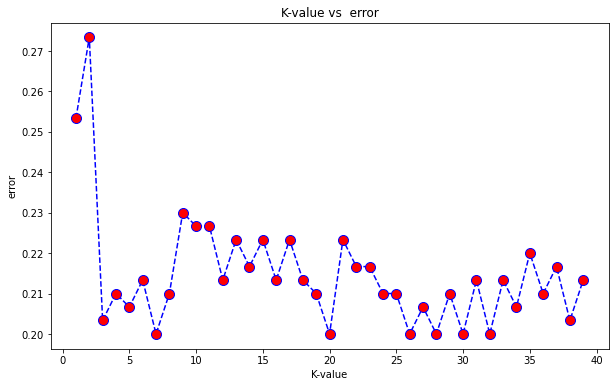

In [27]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='b', linestyle='--', marker='o', markerfacecolor='r', markersize=10)
plt.title('K-value vs  error')
plt.xlabel('K-value')
plt.ylabel('error')
plt.show()

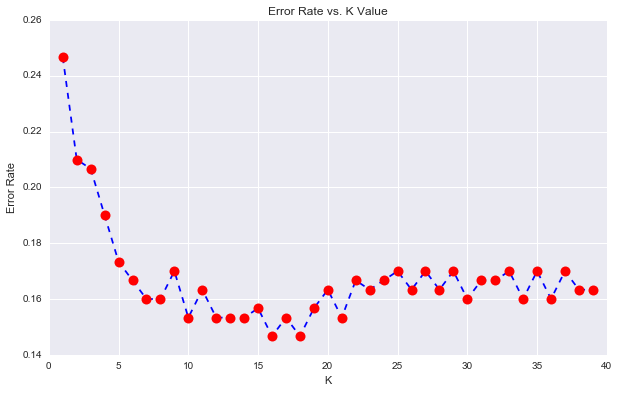

## Retrain with new K Value

**Retrain your model with the best K value (up to you to decide what you want) and re-do the classification report and the confusion matrix.**

In [28]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [29]:
y_pred = knn.predict(x_test)

In [31]:
confusion_matrix(y_test, y_pred)

array([[123,  36],
       [ 24, 117]], dtype=int64)

In [32]:
accuracy_score(y_test, y_pred)

0.8

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.77      0.80       159
           1       0.76      0.83      0.80       141

    accuracy                           0.80       300
   macro avg       0.80      0.80      0.80       300
weighted avg       0.80      0.80      0.80       300



WITH K=30


[[127  25]
 [ 23 125]]


             precision    recall  f1-score   support

          0       0.85      0.84      0.84       152
          1       0.83      0.84      0.84       148

avg / total       0.84      0.84      0.84       300



# Great Job!